In [1]:
from pandas import read_csv
import numpy as np

In [2]:
read_csv('international-airline-passengers.csv')

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
#We don't really need the month column, we just care about each 12 months' passenger_no and followed by the output i.e. the 
#corresponding 13th month's passenger_no
read_csv('international-airline-passengers.csv', usecols = [1])

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [4]:
df = read_csv('international-airline-passengers.csv', usecols = [1])

In [5]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
values = df.values.astype('float32') #type-casting from int to float(not necessary, but I prefer it) and storing the values
#in the dataset(no_of_passengers) in the variable value.

In [7]:
values, values.shape #it is an np array of 144X1 dimensions
#Viewing to decide how to do splitting into train and test

(array([[112.],
        [118.],
        [132.],
        [129.],
        [121.],
        [135.],
        [148.],
        [148.],
        [136.],
        [119.],
        [104.],
        [118.],
        [115.],
        [126.],
        [141.],
        [135.],
        [125.],
        [149.],
        [170.],
        [170.],
        [158.],
        [133.],
        [114.],
        [140.],
        [145.],
        [150.],
        [178.],
        [163.],
        [172.],
        [178.],
        [199.],
        [199.],
        [184.],
        [162.],
        [146.],
        [166.],
        [171.],
        [180.],
        [193.],
        [181.],
        [183.],
        [218.],
        [230.],
        [242.],
        [209.],
        [191.],
        [172.],
        [194.],
        [196.],
        [196.],
        [236.],
        [235.],
        [229.],
        [243.],
        [264.],
        [272.],
        [237.],
        [211.],
        [180.],
        [201.],
        [204.],
        [188.],
        

In [8]:
#Split the data into train and test before going for feature scaling.
train_size = (values.shape[0] * 0.67) #144*0.67
train_size

96.48

In [9]:
#We can't have train_size as float!
train_size = int((values.shape[0] * 0.67)) #int(144*0.67)
train_size

96

In [10]:
test_size = values.shape[0] - train_size 

In [11]:
train = values[0:train_size] #We'll name it as train, not train_data bcoz this is not the final train_data, we have to 
#further transform it. Same, goes for test.
train

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [12]:
test = values[train_size:]
test

array([[315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]], dtype=float32)

In [13]:
#Now, we need to do scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = [0, 1]) #we want the feature range between 0 and 1
#Now, let's update the training values.
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [14]:
#Now that we have our trainig and testing data scaled, let's write a function that will create the actual data for us, as 
#required by the RNN model as discussed in the notes.
def create_dataset(data, k): #k is the window-size
    dataX, dataY = [], [] #the X and Y we want, to create our dataset
    for i in range(data.shape[0] - k): #if we have 100 datapoints and window-size=k, then we will have 100-k  datapoints in 
    #our new data-set format.
        x = data[i : i+k, 0] #current window
        y = data[i + k, 0] #y for current window
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [15]:
#Now let's see if we're able to get the required format of data if we feed create_dataset() data of another format.
#Let's try with test data as it's smaller than training data.
create_dataset(test, 12)
#Why are we geting few values >1 even though we decided the feature range to be 0 to 1? Because, we had fit the scaler using
#training data, and this is testing data.
#So, we are getting the required format of dataset.

(array([[0.04361373, 0.        , 0.17133951, 0.1464175 , 0.16822433,
         0.37694705, 0.51090336, 0.51713395, 0.3208723 , 0.1433022 ,
         0.01246107, 0.1090343 ],
        [0.        , 0.17133951, 0.1464175 , 0.16822433, 0.37694705,
         0.51090336, 0.51713395, 0.3208723 , 0.1433022 , 0.01246107,
         0.1090343 , 0.12149537],
        [0.17133951, 0.1464175 , 0.16822433, 0.37694705, 0.51090336,
         0.51713395, 0.3208723 , 0.1433022 , 0.01246107, 0.1090343 ,
         0.12149537, 0.0529595 ],
        [0.1464175 , 0.16822433, 0.37694705, 0.51090336, 0.51713395,
         0.3208723 , 0.1433022 , 0.01246107, 0.1090343 , 0.12149537,
         0.0529595 , 0.19003117],
        [0.16822433, 0.37694705, 0.51090336, 0.51713395, 0.3208723 ,
         0.1433022 , 0.01246107, 0.1090343 , 0.12149537, 0.0529595 ,
         0.19003117, 0.1464175 ],
        [0.37694705, 0.51090336, 0.51713395, 0.3208723 , 0.1433022 ,
         0.01246107, 0.1090343 , 0.12149537, 0.0529595 , 0.19003117,
  

In [16]:
lookback = 12 #window-size
trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)

In [17]:
#trainY and testY are in the required format.
#But, trainX and testX are not present in the required format.
trainX.shape
#As you can see it's format is (no. of data points X length fo each data point), but we want : 
#(no. of data points X length fo each data point X no. of features in each time-frame)

(84, 12)

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [19]:
#Our dataset is finally ready in the required format.

In [20]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Using TensorFlow backend.


In [21]:
model = Sequential() #model created Sequential model, check notes for diagram
#Now, add layers (SimpleRNN layer) it requires the number of units as well as i/p shape(only in case of 1st layer)
model.add(SimpleRNN(4, input_shape = (lookback, 1))) #window-size X no. of features
model.add(Dense(1)) #adding Dense layer. In this e.g. we're taking only 1 unit in the Dense layer, the o/p unit
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 10, batch_size = 1) #using 10 epoch for now to save time, can experiment with higher epochs.

Epoch 1/10
84/84 [==============================] - 2s 28ms/step - loss: 0.1059
Epoch 2/10
84/84 [==============================] - 1s 17ms/step - loss: 0.0349: 0s - loss:
Epoch 3/10
84/84 [==============================] - 1s 17ms/step - loss: 0.0213
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 0.0173
Epoch 5/10
84/84 [==============================] - 1s 17ms/step - loss: 0.0152
Epoch 6/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0137: 0s - 
Epoch 7/10
84/84 [==============================] - 2s 22ms/step - loss: 0.0127: 0s - loss:
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 0.0112
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 0.0105
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 0.0101: 0s - loss: 0.010


In [22]:
#As you can see it's reducing the cost value with each epoch. This is because it uses backpropagation-through-time.
#It simply means we're doing backpropagation, but here, as the o/p of each unit also depends on previous o/ps, thus, it 
#has to backpropagate through that as well.

In [23]:
testPredict = model.predict(testX) #Predicting values by passing testX
testPredict

array([[0.2175124 ],
       [0.08245803],
       [0.34869185],
       [0.17734334],
       [0.28454122],
       [0.3370127 ],
       [0.55294716],
       [0.6899221 ],
       [0.42318633],
       [0.5386425 ],
       [0.04914066],
       [0.321805  ],
       [0.3210004 ],
       [0.10317078],
       [0.4586779 ],
       [0.08228044],
       [0.3817245 ],
       [0.33598852],
       [0.5637294 ],
       [0.7417592 ],
       [0.35110202],
       [0.61282   ],
       [0.05768859],
       [0.35641298],
       [0.31562477],
       [0.21537723],
       [0.56021917],
       [0.2768569 ],
       [0.548282  ],
       [0.44412768],
       [0.690182  ],
       [0.71970856],
       [0.63168216],
       [0.6090263 ],
       [0.2613449 ],
       [0.4734573 ]], dtype=float32)

In [24]:
#These need not be 0 to 1, so let's unscale it.
testPredict = scaler.inverse_transform(testPredict).ravel()#No need for 2d, we can have it in 1d, so use ravel()
testPredict

#Same goes for training data
trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()#No need for 2d, we can have it in 1d, so use ravel()
trainPredict

#The actual y values
testTrue = scaler.inverse_transform([testY]).ravel()#When we scaled the  training and testing data, they were 2d, but now,
#while unscaling they are present as 1d, so we need to make them 2d, thus I have mentioned [train], not just train
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

In [28]:
from matplotlib import pyplot as plt

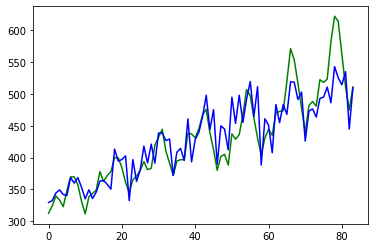

In [29]:
#We'll plot the predicted and actual value against each other in the same graph. actual->green plot, predicted->blue plot
plt.plot(trainTrue, c = 'g') #trainTrue values as y and for x it will just use the indices
plt.plot(trainPredict, c = 'b')
plt.show()

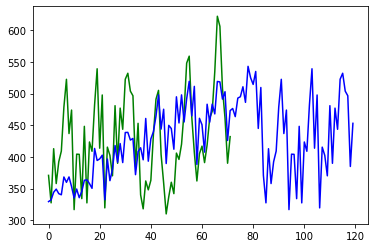

In [33]:
#Now let's combine both train and test
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((testPredict, testTrue))
plt.plot(combinedTrue, c = 'g') 
plt.plot(combinedPredicted, c = 'b')
plt.show()

In [31]:
#Seems like our model predicts well till 84, but after that it's going high where it is supposed to go high but not as high
#as needed. It's following the correct pattern, but not the correct values.

In [32]:
#However, this was just SimpleRNN, we can try out different hyper-parameters. Also, we can learn LSTM which is much more 
#advanced and will improve our predictions.